<a href="https://colab.research.google.com/github/mainguyen198/UCDPA_MaiNguyen/blob/main/UCDPA_MaiNguyen_HeartFailurePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing the dataset**



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
df = pd.read_csv('/content/sample_data/heart2021.csv')
df.info()
df.describe()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


(918, 12)

**Exploratory Data Analysis**

In [ ]:
# Check if there's any missing values:
df.isna().sum().sort_values()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [ ]:
# Looking for duplicates:
df.duplicated().sum()

0

1    508
0    410
Name: HeartDisease, dtype: int64


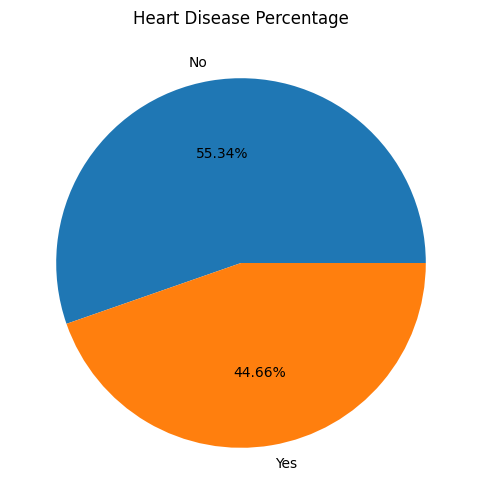

In [52]:
# Heart Disease percentage
print(df['HeartDisease'].value_counts())
plt.figure(figsize=(10,6))
plt.pie(df['HeartDisease'].value_counts(), labels=['No','Yes'], autopct='%1.2f%%')
plt.title('Heart Disease Percentage')
plt.show()

M    725
F    193
Name: Sex, dtype: int64


Text(0.5, 1.0, 'Gender and Heart Disease')

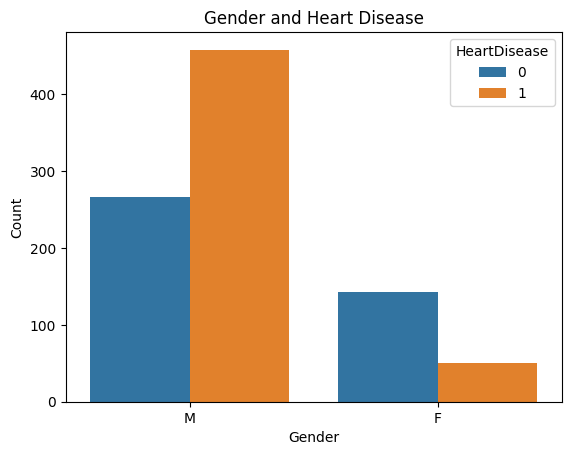

In [75]:
# Gender and Heart Disease
print(df['Sex'].value_counts())

g=sns.countplot(data=df, x='Sex', hue='HeartDisease')
g.set(xlabel='Gender',
      ylabel='Count')
g.set_title("Gender and Heart Disease")

Text(0.5, 1.0, 'Age and Heart Disease')

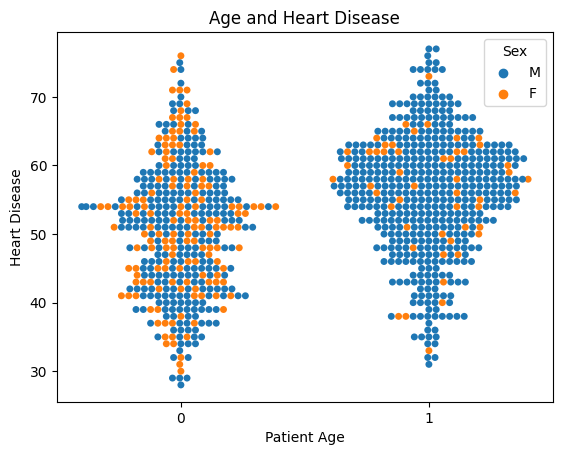

In [33]:
# Age distribution and Heart Disease
g=sns.swarmplot(x='HeartDisease', y='Age', hue='Sex', data=df)
g.set(xlabel='Patient Age',
      ylabel='Heart Disease')
g.set_title("Age and Heart Disease")

Text(0.5, 1.0, 'Chest Pain and Heart Disease')

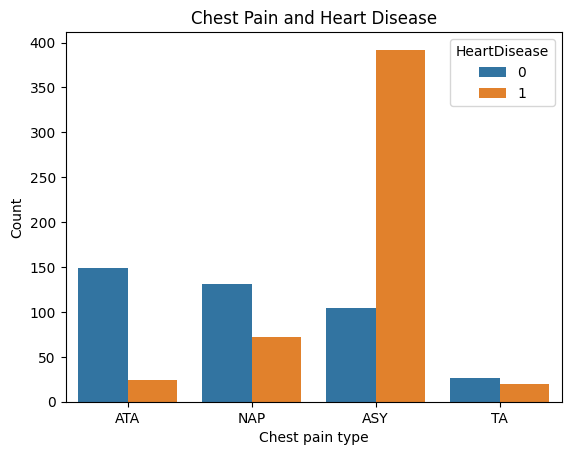

In [36]:
# Chest pain type and Heart disease:
g=sns.countplot(x='ChestPainType', hue= 'HeartDisease',data=df)
g.set(xlabel='Chest pain type',
      ylabel='Count')
g.set_title("Chest Pain and Heart Disease")

Text(0.5, 1.0, 'Resting ECG and Heart Disease')

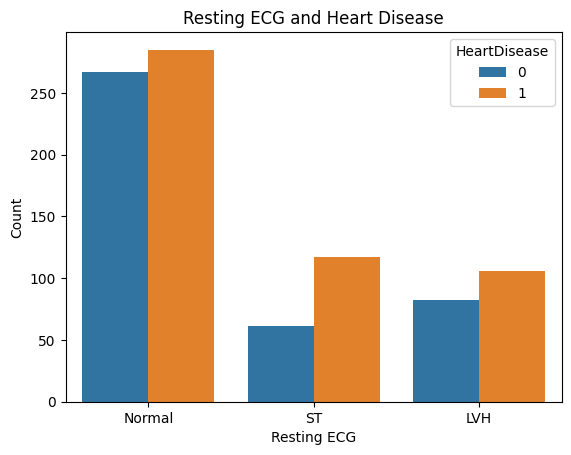

In [40]:
# Fasting Blood Sugar and Heart Disease
g=sns.countplot(x='RestingECG', hue='HeartDisease', data=df)
g.set(xlabel='Resting ECG',
      ylabel='Count')
g.set_title("Resting ECG and Heart Disease")

N    547
Y    371
Name: ExerciseAngina, dtype: int64


Text(0.5, 1.0, 'Exercise-induced Angina and Heart Disease')

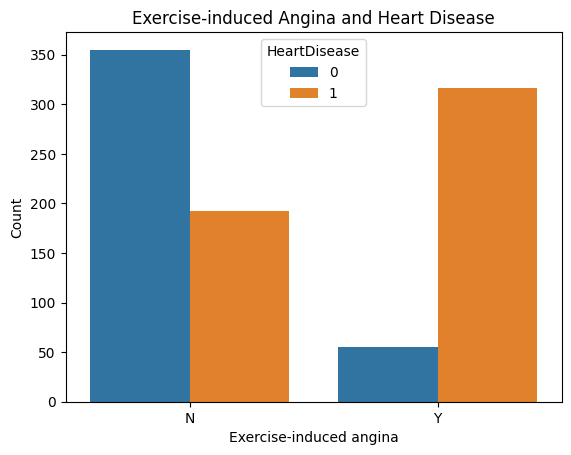

In [47]:
# Exercise Angina and Heart Disease
print(df['ExerciseAngina'].value_counts())

g=sns.countplot(x='ExerciseAngina', hue='HeartDisease', data=df)
g.set(xlabel='Exercise-induced angina',
      ylabel='Count')
g.set_title("Exercise-induced Angina and Heart Disease")

Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64


Text(0.5, 1.0, 'ST Slope and Heart Disease')

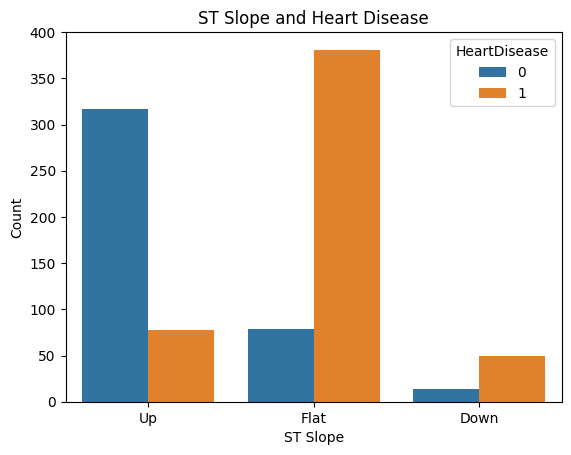

In [49]:
# ST Slope and Heart Disease
# Exercise Angina and Heart Disease
print(df['ST_Slope'].value_counts())

g=sns.countplot(x='ST_Slope', hue='HeartDisease', data=df)
g.set(xlabel='ST Slope',
      ylabel='Count')
g.set_title("ST Slope and Heart Disease")

<ipython-input-50-474cf5b3afa0>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 [Text(0.5, 0, 'Age'),
  Text(1.5, 0, 'RestingBP'),
  Text(2.5, 0, 'Cholesterol'),
  Text(3.5, 0, 'FastingBS'),
  Text(4.5, 0, 'MaxHR'),
  Text(5.5, 0, 'Oldpeak'),
  Text(6.5, 0, 'HeartDisease')])

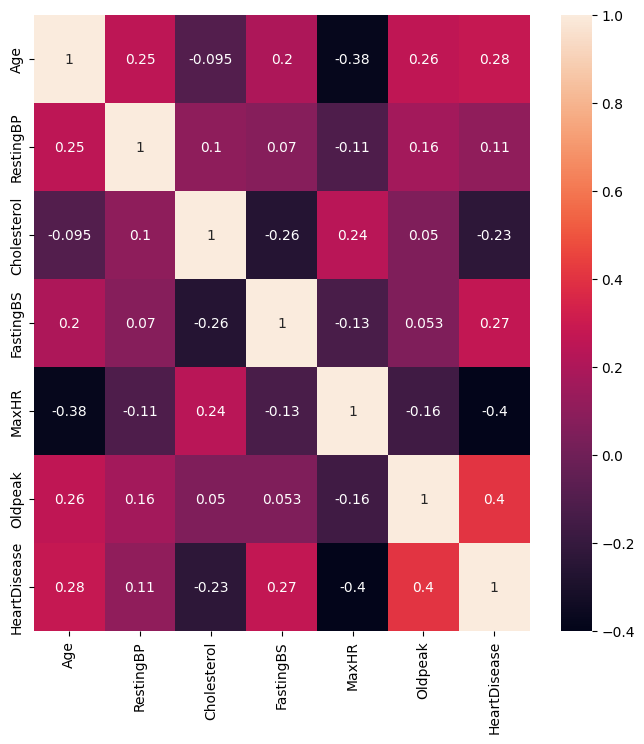

In [50]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), annot=True)
plt.xticks(rotation=90)

**Preprocessing the dataset:** Convert categorical variables into dummies

In [ ]:
# get dummies for categorical variables: drop_first=True because the model is linear regression which is sensitive to multicollinearity issue
dataset = pd.get_dummies(df, columns=['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], drop_first=True)

In [ ]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                918 non-null    int64  
 1   RestingBP          918 non-null    int64  
 2   Cholesterol        918 non-null    int64  
 3   FastingBS          918 non-null    int64  
 4   MaxHR              918 non-null    int64  
 5   Oldpeak            918 non-null    float64
 6   HeartDisease       918 non-null    int64  
 7   Sex_M              918 non-null    uint8  
 8   ChestPainType_ATA  918 non-null    uint8  
 9   ChestPainType_NAP  918 non-null    uint8  
 10  ChestPainType_TA   918 non-null    uint8  
 11  RestingECG_Normal  918 non-null    uint8  
 12  RestingECG_ST      918 non-null    uint8  
 13  ExerciseAngina_Y   918 non-null    uint8  
 14  ST_Slope_Flat      918 non-null    uint8  
 15  ST_Slope_Up        918 non-null    uint8  
dtypes: float64(1), int64(6), u

Import the library to process:

Since this is a Classification problem, I'm using Logistic Regression and KNeighborsClassifier as the models for machine learning

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

In [60]:
X = dataset.drop(['HeartDisease'], axis = 1).values
y = dataset['HeartDisease'].values

print(X.shape, y.shape)

(918, 15) (918,)


In [61]:
# split and scale the data:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [62]:
reg = LogisticRegression(solver='lbfgs', max_iter=3000)

**Hyperparameter Tuning for Logistic Regression model**

In [63]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score
kf = KFold(n_splits=5, shuffle=True, random_state=42)
param_grid = {'C': np.linspace(0.001, 1, 10)}


In [64]:
reg_cv = GridSearchCV(reg, param_grid, cv=kf)
reg_cv.fit(X_train, y_train)


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(max_iter=3000),
             param_grid={'C': array([0.001, 0.112, 0.223, 0.334, 0.445, 0.556, 0.667, 0.778, 0.889,
       1.   ])})

In [65]:
print(reg_cv.best_params_, reg_cv.best_score_)

{'C': 0.445} 0.8528934861615879


In [66]:
y_reg_pred = reg_cv.predict(X_test)

In [67]:
# Accuracy score on the Test data:
print(reg_cv.score(X_test, y_test))

0.8804347826086957


In [68]:
# Confusion matrix:
print(confusion_matrix(y_test, y_reg_pred))
print(classification_report(y_test, y_reg_pred))

[[67 15]
 [ 7 95]]
              precision    recall  f1-score   support

           0       0.91      0.82      0.86        82
           1       0.86      0.93      0.90       102

    accuracy                           0.88       184
   macro avg       0.88      0.87      0.88       184
weighted avg       0.88      0.88      0.88       184



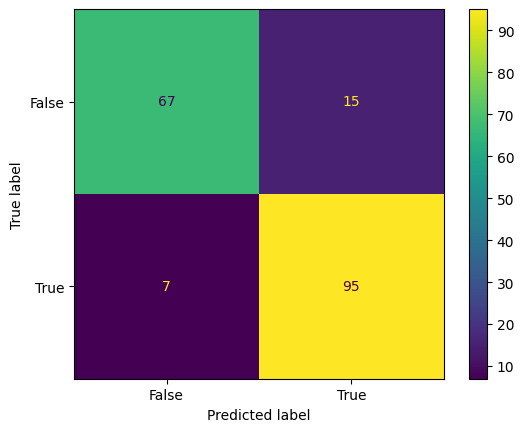

In [69]:
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix(y_test, y_reg_pred), display_labels=[False,True])
cm_display.plot()

Accuracy score is 88%.

The model produces 95 true positives and 15 false positive, meaning precision is 86%, which is also confirmed in the classification report. For the zero class, the model produces 67 true negatives, 7 false negatives, presicion is 91%. We want the number of false negatives as low as possible because it's dangerous for a patient with heart disease being diagnosed as healthy, which will delay the treatment and could lead to fatal consequences.

High recall for 1-class meaning lower false negative rate. In this case, it is 93%. We want this as high as possible. Let's examine this rate in the KNN model in the next section.

**Tuning for KNN model:**

In [71]:
knn = KNeighborsClassifier()
param_knn = {'n_neighbors': np.arange(1,50)}
knn_cv = GridSearchCV(knn, param_grid=param_knn)
knn_cv.fit(X_train, y_train)
print(knn_cv.best_params_, knn_cv.best_score_)

{'n_neighbors': 24} 0.7165781381045568


Using the Logreg with C = 0.112 gives score of performance of 0.84 while with KNN model with n_neighbors = 1 gives a better performance of 0.96.

In [72]:
# Accuracy score on the Test data:
y_knn_pred=knn_cv.predict(X_test)
print(accuracy_score(y_knn_pred, y_test))

0.7282608695652174


In [73]:
# Confusion matrix:
print(confusion_matrix(y_test, y_knn_pred))
print(classification_report(y_test, y_knn_pred))

[[59 23]
 [27 75]]
              precision    recall  f1-score   support

           0       0.69      0.72      0.70        82
           1       0.77      0.74      0.75       102

    accuracy                           0.73       184
   macro avg       0.73      0.73      0.73       184
weighted avg       0.73      0.73      0.73       184



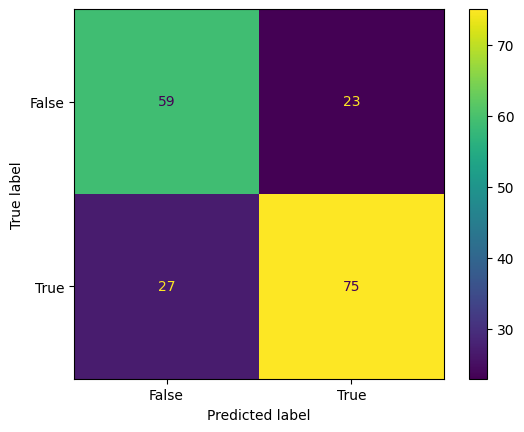

In [74]:
# Visualising confusion matrix:
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix(y_test, y_knn_pred), display_labels=[False,True])
cm_display.plot()

The model produces 75 true positives and 23 false positive, meaning precision is 77%, which is also confirmed in the classification report. For zero class, the model produces 59 true negatives, 27 false negatives, precision is 69%.

Recall rate for 1-class is 74% which is also a lower rate than the Logistic Regression model.

The Confusion Matrix and Classification Report suggests that Logistic Regression model performs better than KNN model for this dataset.

Making a Predictive System: If the data is given, it will predict if the person can have heart disease or not.



In [ ]:
X_new = X_test[120].reshape(1,15)
prediction = reg_cv.predict(X_new)
print(prediction)

if(prediction[0] ==0):
  print('the object does not have heart disease')
else:
  print('the object has heart disease')

# Double check with the value in the HeartDisease column of the same index
print(y_test[120])

[0]
the object does not have heart disease
0


**Part 2: Second Dataset - Fashion Trend**

Import dataset:

In [ ]:
# Import the data using API path and token:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/sample_data'
!kaggle datasets download -d durgeshrao9993/dataset

  0% 0.00/351k [00:00<?, ?B/s]
100% 351k/351k [00:00<00:00, 80.3MB/s]


In [ ]:
!unzip \*.zip && rm *.zip

Archive:  dataset.zip
  inflating: summer-products.csv     


In [ ]:
import pandas as pd
df_2 = pd.read_csv('/content/summer-products.csv')

In [ ]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 43 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         1573 non-null   object 
 1   title_orig                    1573 non-null   object 
 2   price                         1573 non-null   float64
 3   retail_price                  1573 non-null   int64  
 4   currency_buyer                1573 non-null   object 
 5   units_sold                    1573 non-null   int64  
 6   uses_ad_boosts                1573 non-null   int64  
 7   rating                        1573 non-null   float64
 8   rating_count                  1573 non-null   int64  
 9   rating_five_count             1528 non-null   float64
 10  rating_four_count             1528 non-null   float64
 11  rating_three_count            1528 non-null   float64
 12  rating_two_count              1528 non-null   float64
 13  rat

Handling missing values

In [ ]:
print(df_2.isna().sum().sort_values())

title                              0
theme                              0
shipping_option_name               0
shipping_option_price              0
shipping_is_express                0
countries_shipped_to               0
inventory_total                    0
tags                               0
merchant_title                     0
merchant_rating                    0
merchant_id                        0
merchant_has_profile_picture       0
product_url                        0
product_picture                    0
product_id                         0
merchant_rating_count              0
badge_fast_shipping                0
product_variation_inventory        0
badge_local_product                0
title_orig                         0
price                              0
retail_price                       0
currency_buyer                     0
units_sold                         0
uses_ad_boosts                     0
rating                             0
badge_product_quality              0
r

In [ ]:
# drop the missing values of those columns <5% (78)
df_2 = df_2.dropna(subset=['merchant_info_subtitle', 'merchant_name', 'product_variation_size_id', 'origin_country', 'product_color', 'rating_four_count', 'rating_three_count',
                       'rating_two_count', 'rating_one_count', 'rating_five_count'])
print(df_2.isna().sum().sort_values())

title                              0
shipping_option_name               0
shipping_option_price              0
shipping_is_express                0
countries_shipped_to               0
inventory_total                    0
origin_country                     0
merchant_title                     0
theme                              0
merchant_name                      0
merchant_rating_count              0
merchant_rating                    0
merchant_id                        0
merchant_has_profile_picture       0
product_url                        0
product_picture                    0
product_id                         0
merchant_info_subtitle             0
product_variation_size_id          0
product_variation_inventory        0
tags                               0
title_orig                         0
price                              0
retail_price                       0
currency_buyer                     0
units_sold                         0
uses_ad_boosts                     0
r

In [ ]:
# c
df_2=df_2.drop(['urgency_text', 'merchant_profile_picture'], axis=1)

In [ ]:
# Column 'has_urgency_banner' has value 1 meaning yes, and no value meaning no. We can replace this missing values with 0:
df_2['has_urgency_banner']=df_2['has_urgency_banner'].fillna(0)

In [ ]:
#check if there's any missing values left:
print(df_2.isna().sum().sort_values())

title                           0
shipping_option_name            0
shipping_option_price           0
shipping_is_express             0
countries_shipped_to            0
inventory_total                 0
has_urgency_banner              0
origin_country                  0
merchant_title                  0
merchant_name                   0
merchant_info_subtitle          0
merchant_rating_count           0
merchant_rating                 0
merchant_id                     0
merchant_has_profile_picture    0
product_url                     0
product_picture                 0
product_id                      0
product_variation_inventory     0
theme                           0
product_variation_size_id       0
tags                            0
title_orig                      0
price                           0
retail_price                    0
currency_buyer                  0
units_sold                      0
uses_ad_boosts                  0
rating                          0
rating_count  

Convert data type:

In [ ]:
# Convert data type: the column: 'has_urgency_banner' should be in integer instead of float:
df_2['has_urgency_banner'] = df_2['has_urgency_banner'].astype('int')
print(df_2['has_urgency_banner'].dtypes)

int64


Use of Dictionary, create reusable function, and 'for' loop

In [ ]:
# I'm interested in Clothing only. Let's filter out the clothing items based on the size using Regular Expression

dict = {'dress': ['dress', 'dress', 'Dress', 'Dresses', 'robe', 'robes', 'Robe', 'Robes'],
        'skirt': ['skirt', 'skirts', 'Skirt', 'Skirts'],
        'pants': ['pants', 'pant', 'Pant', 'Pants', 'trouser', 'trousers', 'Trouser', 'Trousers'],
        'top': ['t-shirt', 'T-shirt', 't-shirts', 'T-shirts', 'crop top', 'Crop Top', 'chemise', 'chemises', 'Chemise', 'Chemises', 'top', 'tops', 'Top',
                'Tops', 'blouse', 'blouses', 'Blouse', 'Blouses', 'shirt', 'shirts', 'Shirt', 'Shirts'],
        'legging': ['legging', 'leggings', 'Legging', 'Leggings'],
        'nightwear': ['pyjamas', 'Pyjamas', 'Loungewear', 'loungewear', 'Loungewears', 'loungewears', 'sleepwear', 'sleepwears', 'Sleepwear', 'Sleepwears'],
        'beachwear': ['bikini', 'bikinies', 'beach', 'Beach', 'swimsuit', 'Swimsuit'],
        'cardigan': ['cardigan', 'cardigans', 'Cardigan', 'Cardigans']}

def classify(text):
    c_type = 'None of any'
    for i in dict:
        if any(j in text for j in dict[i]):
            c_type = i
    return c_type

new_df = pd.DataFrame({'text': df_2['title_orig']})
df_2['cat'] = new_df['text'].apply(lambda x: classify(x))
print(df_2['cat'].value_counts())

top            512
beachwear      341
dress          259
pants          151
None of any    133
legging         27
skirt           19
nightwear        9
cardigan         6
Name: cat, dtype: int64


Use of Regex to extract a pattern in data





In [76]:
# create a sample dataframe:

data = {'Name':['Alison Niot', 'Javier Lopez', 'Mariana Burito'], 'Age': [30, 28, 35], 'Email':['alison@example.com', 'javier@example.com', 'mariana@example.com']}
df_3=pd.DataFrame(data)
print(df_3)

             Name  Age                Email
0     Alison Niot   30   alison@example.com
1    Javier Lopez   28   javier@example.com
2  Mariana Burito   35  mariana@example.com


In [77]:
# Use of Regex to extract data:
import re
df_3['First Name'] = df_3['Name'].str.extract(r'(\w+)')
df_3['Last Name'] = df_3['Name'].str.extract(r'(\w+$)')
df_3['Email Domain'] = df_3['Email'].str.extract(r'@(\w+.\w+)')
print(df_3)


             Name  Age                Email First Name Last Name Email Domain
0     Alison Niot   30   alison@example.com     Alison      Niot  example.com
1    Javier Lopez   28   javier@example.com     Javier     Lopez  example.com
2  Mariana Burito   35  mariana@example.com    Mariana    Burito  example.com


Web scraping



In [ ]:
from bs4 import BeautifulSoup
import requests
import csv

In [ ]:
source = requests.get('https://www.bbc.com/business').text
soup = BeautifulSoup(source, 'lxml')
print(soup.prettify())

In [ ]:
article=soup.find('article')
headline=article.h3.a.text
print(headline)

Aslef train drivers announce new strike date


In [ ]:
summary=article.find('p', class_='lx-stream-related-story--summary qa-story-summary').text
print(summary)

Drivers will walk out on 1 September and refuse to work overtime on 2 September, the union says.


In [ ]:
art_link=article.find('a', class_='qa-heading-link lx-stream-post__header-link')['href']
full_link=f'https://bbc.com{art_link}'
print(full_link)

https://bbc.com/news/business-66544391


In [ ]:
# set up a csv file to save the result
csv_file=open('web_scrape.csv', 'w')
csv_writer=csv.writer(csv_file)
csv_writer.writerow(['headline','summary','article_link'])

31

In [ ]:
for article in soup.find_all('article'):
#print(article.prettify())
  headline=article.h3.a.text
  print(headline)
  summary=article.find('p', class_='lx-stream-related-story--summary qa-story-summary').text
  print(summary)
  try:
    art_link=article.find('a', class_='qa-heading-link lx-stream-post__header-link')['href']
    full_link=f'https://bbc.com{art_link}'
  except Exception as e:
    full_link = None

  print(full_link)
  print()

  csv_writer.writerow([headline,summary,full_link])

csv_file.close()

Aslef train drivers announce new strike date
Drivers will walk out on 1 September and refuse to work overtime on 2 September, the union says.
https://bbc.com/news/business-66544391

Construction firm collapses with loss of 180 jobs
Allma Construction in Barrhead, East Renfrewshire, has blamed a downturn in the housing sector.
https://bbc.com/news/uk-scotland-glasgow-west-66547943

Shop sales hit by July's wet weather
Retail sales fell by 1.2% following the poor weather with clothing sales proving a washout.
https://bbc.com/news/business-66536000

Energy bills predicted to drop in October
Ofgem is poised to announce a small cut in its price cap next week, a consultancy firm forecasts.
https://bbc.com/news/business-66542340

China Evergrande files for US bankruptcy protection
The move comes as fears grow over problems in the world's second largest economy.
https://bbc.com/news/business-66540785

Major construction company on brink of collapse
Buckingham Group, which has worked on HS2 and